# Passive Cell Tutorial

##### Developed in the Neural Engineering Laboratory at the University of Missouri by Ben Latimer

<img src="Neuron_1.jpg">

### In this tutorial, we'll explore the properties of the cell membrane and how to simulate a cell in the NEURON + Python environment. If this is your first time coding, don't worry! Just click the "Run" button above to go through step-by-step. You don't need to change anything yet. 

### Before you start any project, you need to get the tools. In Python, we do this using the "import" statement in the cell below. Click "Run" to proceed.

In [1]:
#%matplotlib qt5
from neuron import h
from matplotlib import pyplot

h.load_file('stdrun.hoc')

1.0

## 1) <u>Create the cell and define its geometry

#### NEURON defines a cell as a cylinder so we only need to give length and diameter

<img src="cylinder.png">

In [2]:
#Create the soma section and define the default parameters
soma = h.Section(name='soma')
soma.diam = 500 #default is micrometers
soma.L = 100 #um

## 2) <u>Define the cell's biophysics

In [8]:
soma.cm = 1.4884e-4/6.2832e-4 #uF

#Insert the Hodgkin-Huxley channels and define the conductances
soma.insert('hh')

#We're making the active conductances zero because we want to model a passive cell
soma.gnabar_hh = 0.12 
soma.gkbar_hh = 0.036
soma.gl_hh = 2.0e-5
soma.el_hh = -70

v_init = h.v_init= -60

## 3) <u>Inject Current
### Neuroscientists call this experiment a "current clamp". We place an electrode into the cell and inject current.

In [56]:
#Inject current in the middle of the soma
stim = h.IClamp(soma(0.5))
stim.delay = 100.0 #ms
stim.dur = 100.0 #ms
stim.amp = 10.0 #nA

## 4) <u>Setup the simulation and look at the results!

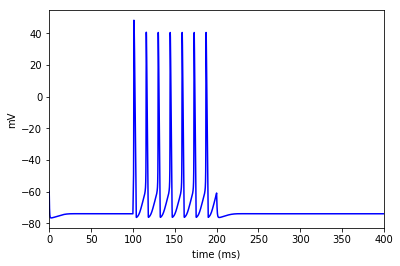

In [57]:
# We use this package for visualization
import matplotlib.pyplot as plt

tstop = h.tstop = 400   #ms
h.dt = 0.025

v0_vec = h.Vector()
t_vec = h.Vector()
f_vec = h.Vector()

v0_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)

h.run()

plt.figure()
plt.plot(t_vec, v0_vec,'b')
plt.xlim(0, tstop)
plt.xlabel('time (ms)')
plt.ylabel('mV')

plt.show()

In [73]:
# Calculate spike frequency
import numpy as np

def spike_freq(t_vec,v0_vec):
    t = np.array(t_vec)
    v0 = np.array(v0_vec)

    prev = v0[0] or 0.001
    threshold = 1
    peaks = []

    for num, i in enumerate(v0[1:], 1):
        if (i - prev) / prev > threshold and v0[num] > 0:
            peaks.append(num)
        prev = i or 0.001
   
    num_peaks = len(peaks)
    sp_freq = num_peaks / 100.0
    return sp_freq

print(spike_freq(t_vec,v0_vec))

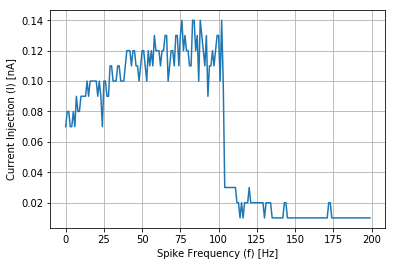

In [90]:
# Create plot of current injection (nA) vs spike frequency [Hz]
current_vals = np.arange(0,200,1) # Go from 0 to 100 nA in 0.1 nA steps
spike_freqs = []

for i in current_vals:
    #Inject current in the middle of the soma
    stim = h.IClamp(soma(0.5))
    stim.delay = 100.0 #ms
    stim.dur = 100.0 #ms
    stim.amp = i #nA
    tstop = h.tstop = 400   #ms
    h.dt = 0.025

    v0_vec = h.Vector()
    t_vec = h.Vector()
    f_vec = h.Vector()

    v0_vec.record(soma(0.5)._ref_v)
    t_vec.record(h._ref_t)

    h.run()
    freq = spike_freq(t_vec,v0_vec)
    spike_freqs.append(freq)

plt.figure()
plt.grid()
plt.plot(current_vals,spike_freqs)
plt.xlabel('Spike Frequency (f) [Hz]')
plt.ylabel('Current Injection (I) [nA]')
plt.show()

## 5) <u> Interact with the model

##### So far, we've built the cell and simulated it with one set of parameters. But what if we want to change the parameters to see the effect on the output? In this part of the tutorial, we'll set the model up and then use sliders to interact with the parameters. Don't worry about all the code that's coming up, it's just a repeat of what we've already done.

In [6]:
from ipywidgets import interactive
def passivemodel(L,diam,cm,gl,el):
    soma = h.Section(name='soma')
    soma.diam = diam #default is micrometers
    soma.L = L #um
    soma.cm = cm
    soma.insert('hh')
    soma.gnabar_hh = 0.0 
    soma.gkbar_hh = 0.0
    soma.gl_hh = gl*1e-5
    soma.el_hh = el

    v_init = h.v_init= el
    stim = h.IClamp(soma(0.5))
    stim.delay = 200.0 #ms
    stim.dur = 500.0 #ms
    stim.amp = 1.0 #nA
    tstop = h.tstop = 1000   #ms
    h.dt = 0.025

    v0_vec = h.Vector()
    t_vec = h.Vector()

    v0_vec.record(soma(0.5)._ref_v)
    t_vec.record(h._ref_t)

    h.run()

    plt.figure(figsize=(10,7))
    plt.plot(t_vec, v0_vec,'b')
    plt.xlim(0, tstop)
    plt.ylim(-80,60)
    plt.xlabel('time (ms)')
    plt.ylabel('mV')

    plt.show()

In [7]:
interactive(passivemodel,L=(0,300,20),diam=(0,300,20),cm=(0.1,2,0.1),gl=(0.5,4,0.1),el=(-80,-60,2))

interactive(children=(IntSlider(value=140, description='L', max=300, step=20), IntSlider(value=140, descriptio…